In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

#For Date
from datetime import date

In [13]:
start = '2011-01-01'
end = date.today()
#print(end)

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.891260
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.106223
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.158967
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.242066
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.233788


In [15]:
df = df.reset_index()
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.891260
1,1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.106223
2,2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.158967
3,3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.242066
4,4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.233788


In [16]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,index,High,Low,Open,Close,Volume
0,0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,4,11.973214,11.889286,11.954286,11.918929,300428800.0


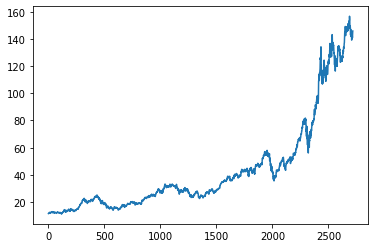

In [17]:
plt.plot(df.Close)

In [18]:
df

,index,High,Low,Open,Close,Volume
0,0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...,...
2713,2713,143.250000,141.039993,143.229996,141.509995,73035900.0
2714,2714,141.399994,139.199997,141.240005,140.910004,78762700.0
2715,2715,143.880005,141.509995,142.110001,143.759995,69907100.0
2716,2716,144.899994,143.509995,143.770004,144.839996,67885200.0


In [19]:
ma100 = df.Close.rolling(100).mean() #What does rolling() function do?
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2713    141.72940
2714    141.88420
2715    142.05080
2716    142.23020
2717    142.41995
Name: Close, Length: 2718, dtype: float64

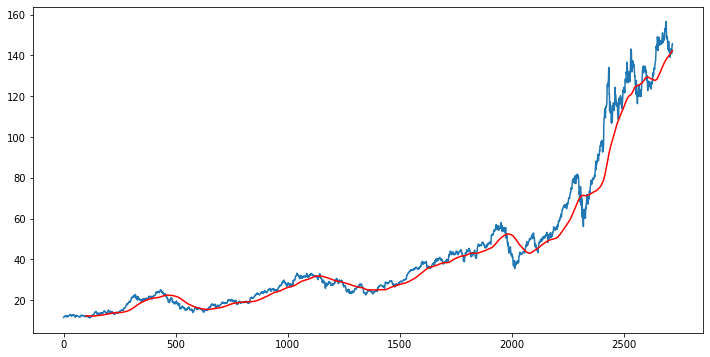

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [21]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2713    135.441650
2714    135.462750
2715    135.507200
2716    135.562800
2717    135.628475
Name: Close, Length: 2718, dtype: float64

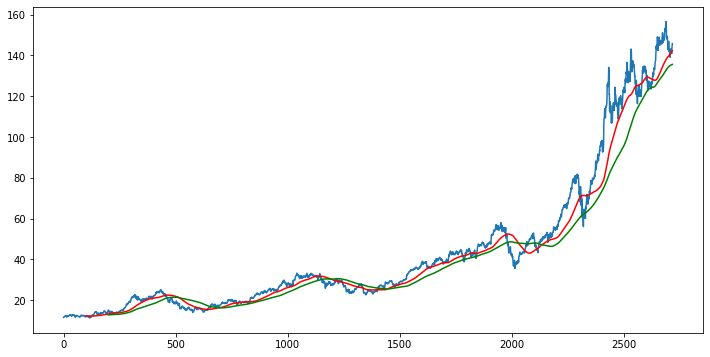

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [23]:
df.shape

(2718, 6)

In [24]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)
                                        

(1902, 1)
(816, 1)


In [25]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [26]:
data_testing.head()

,Close
1902,48.250000
1903,48.705002
1904,48.552502
1905,47.744999
1906,47.477501


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [5]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

NameError: name 'scaler' is not defined

In [53]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#ML model

In [54]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [57]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'] )
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
57/57 [==============================] - 15s 218ms/step - loss: 0.0024 - accuracy: 0.0011
Epoch 2/50
57/57 [==============================] - 11s 201ms/step - loss: 0.0024 - accuracy: 0.0011
Epoch 3/50
57/57 [==============================] - 10s 178ms/step - loss: 0.0022 - accuracy: 0.0011
Epoch 4/50
57/57 [==============================] - 15s 256ms/step - loss: 0.0024 - accuracy: 0.0011
Epoch 5/50
57/57 [==============================] - 11s 198ms/step - loss: 0.0020 - accuracy: 0.0011
Epoch 6/50
57/57 [==============================] - 12s 209ms/step - loss: 0.0024 - accuracy: 0.0011
Epoch 7/50
57/57 [==============================] - 10s 177ms/step - loss: 0.0021 - accuracy: 0.0011
Epoch 8/50
57/57 [==============================] - 13s 225ms/step - loss: 0.0022 - accuracy: 0.0011
Epoch 9/50
57/57 [==============================] - 12s 209ms/step - loss: 0.0023 - accuracy: 0.0011
Epoch 10/50
57/57 [==============================] - 13s 231ms/step - loss: 0.0019 - accura

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
data_training.tail()

In [ ]:
past_100_days = data_training.tail(100)

final_df = past_100_days.append(data_testing, ignotr_index=True)

In [ ]:
final_df.head()

input_data = scaler.it_transform(final_df)

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted = model.predict(x_test)

y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [58]:
scaler.scale_

array([0.00825474])

In [59]:
scale_factor = 1/0.00825474
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

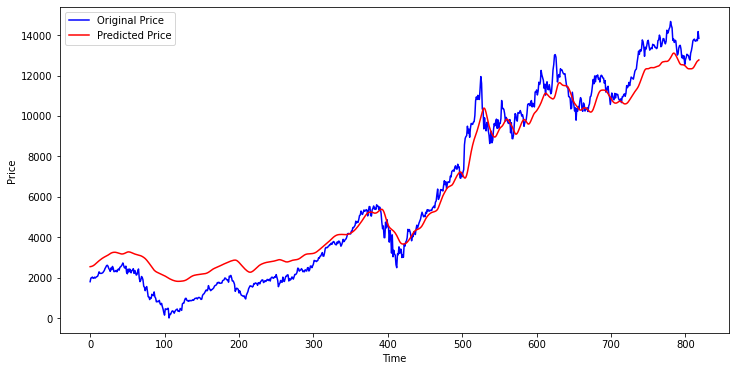

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show